In [50]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [51]:
#import dataset
calories_data = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [52]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [53]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [54]:
td = pd.concat([exercise_data,calories_data['Calories']], axis =1)

In [55]:
td

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [56]:
#checking for missing values
td.isnull().sum()
#no missing values are found

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [57]:
#analysis of data -- statistical info
td.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [58]:
value_mapping = {'male': 1, 'female': 0}

In [59]:
td['Gender'] = td['Gender'].replace(value_mapping)

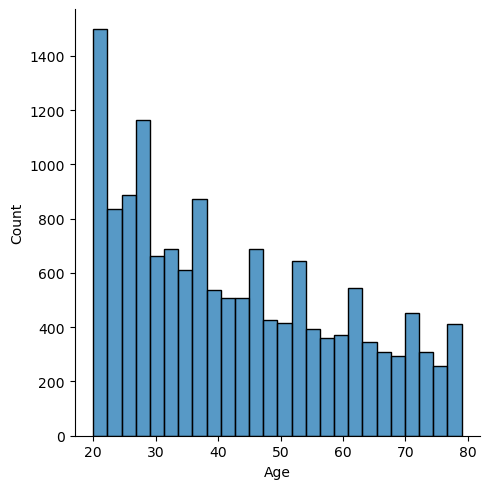

In [60]:
#Distribution plot
sns.displot(td['Age'])
# more data towards lower end of age spectrum

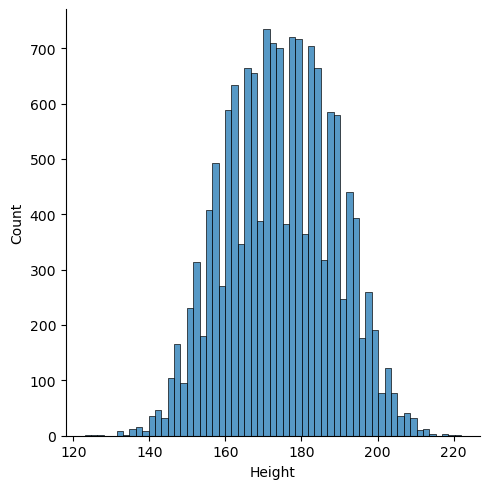

In [61]:
#Distribution plot
sns.displot(td['Height'])
# --> normal

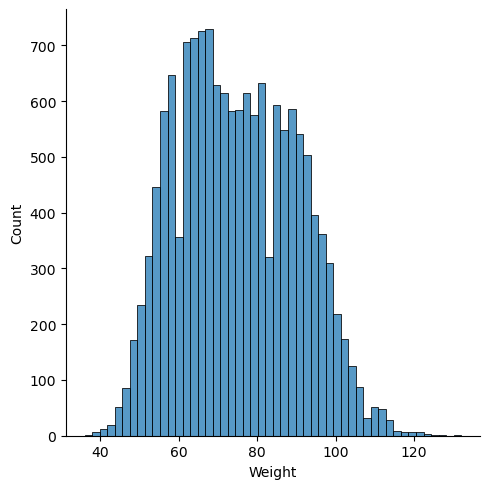

In [62]:
#Distribution plot
sns.displot(td['Weight'])
# --> normal 

Finding Correlation in Data

In [63]:
correlation = td.corr()

<Axes: >

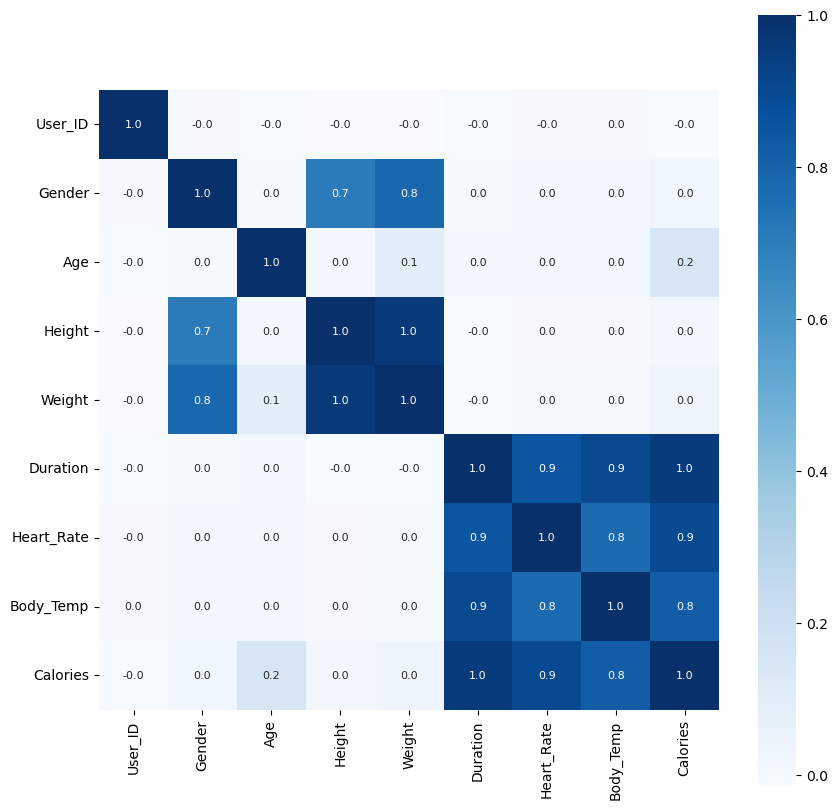

In [64]:
#construct a heatmap to understand correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' ,annot = True , annot_kws = {'size' : 8}, cmap = 'Blues')

The heat map above helps us understand how the data is related to each other.
In this case we can see that the duration , body temp and  Heart Rate are important parameters and are postively correlated with the Calories Burnt.

Separating features and Targets

In [65]:
X = td.drop(columns = ['User_ID', 'Calories'] , axis = 1)

In [66]:
Y = td['Calories']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=2,
)

In [68]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(12000, 7) (3000, 7) (12000,) (3000,)


Model Training

In [69]:
model = XGBRegressor()

In [70]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
predictions = model.predict(X_test)

In [81]:
print("Mean absolute error  - ", metrics.mean_absolute_error(Y_test, predictions))

Mean absolute error  -  1.4807048829992613
